In [29]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.style as style
style.use('seaborn-poster')
%matplotlib notebook

In [2]:
DEATH_BY_COV = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
CASES_COV = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [3]:
def data_preparation(url):
    """
    Function to prepare the data to be analyzed.
    """
    data_df = pd.read_csv(url)
    colums_exclud = data_df.columns[[0, 2, 3]]
    data_df.drop(colums_exclud,
                 axis=1,
                 inplace=True)
    data_df = data_df.set_index("Country/Region")
    data_df = data_df.groupby(level=0).sum()
    return data_df


In [4]:
def data_country(cases_table, death_table, country):
    """
    Function to create a matrix with data of confirmed cases of COVID-19 and death by COVID-19.
    The first column is data-times, the second column is confirmed cases of COVID-19, and the
    third column is deaths by COVID-19.
    PARAMETERS
    ----------
    data_table: DataFrame with cases
    death_table: DataFrame with deaths
    country: Country to analize
    """
    data_cases = cases_table.loc[country]
    data_death = death_table.loc[country]
    data_array = np.c_[data_cases.index,
                       data_cases.values,
                       data_death.values]
    return data_array

In [5]:
cases_df = data_preparation(url=CASES_COV)
death_df = data_preparation(url=DEATH_BY_COV)

In [125]:
def country_plot(data_cases, data_death, country, subplot=True, save=True):
    """
    Function to plot the data of COVID-19 confirmed cases and deaths by COVID-19 in
    the same plot.
    PARAMETERS
    ----------
    data_cases: DataFrame with cases.
    data_death: DataFrame with deaths.
    country: Country to analize.
    subplot: Subplot with last seven days. Default value is True.
    save: Flag to save the plot. Default value is True.
    """
    labels = "COVID-19 cases,COVID-19 deaths".split(",")
    colors = "tab:blue tab:red".split(" ")
    linestyle = "-. --".split(" ")
    linewidth = 0.9
    width = 0.30
    step_x = 20
    step_y = 15
    size = 12
    labely = "Confirmed COVID-19 cases"
    labely2 = "Deaths reported by COVID-19"

    data_df = data_country(cases_table=data_cases,
                           death_table=data_death,
                           country=country)
    date_time = np.array(list(map(lambda x: datetime.strptime(x, "%m/%d/%y"),
                                  data_df[:, 0])))
    cases = data_df[:, 1]
    deaths = data_df[:, 2]

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title(f"Virus behavior in {country}", size=size + 5)
    ax_death = ax.twinx()

    ax.plot(date_time,
            cases,
            label=labels[0],
            ls=linestyle[0],
            linewidth=linewidth,
            color=colors[0])
    ax.plot(np.nan,
            label=labels[1],
            linewidth=linewidth,
            ls=linestyle[1],
            color=colors[1])

    ax_death.plot(date_time,
                  deaths,
                  label=labels[1],
                  linewidth=linewidth,
                  ls=linestyle[1],
                  color=colors[1])

    data_ticks = date_time[np.arange(0,
                                    len(date_time),
                                    step_x)]
    ax.set_xticks(data_ticks)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%d'))
    ax.xaxis.set_tick_params(rotation=0,
                             labelsize=size-3)


    cases_tick = np.linspace(0,
                             cases[-1],
                             step_y,
                             dtype=int)
    ax.set_yticks(cases_tick)
    ax.yaxis.set_tick_params(labelsize=size-3)
    ax.set_ylabel(labely,
                  size=size)

    death_tick = np.linspace(0,
                             deaths[-1],
                             step_y,
                             dtype=int)
    ax_death.set_yticks(death_tick)
    ax_death.yaxis.set_tick_params(labelsize=size-3)
    ax_death.set_ylabel(labely2,
                        size=size)
    ax.grid(True,
            ls=":",
            lw=0.5,
            alpha=0.5,
            color="black")
    ax.legend(loc=4,
              fontsize=size-4,
              frameon=False)

    if subplot:
        last_week_values = (cases[-7:], deaths[-7:])
        ax_cases = inset_axes(ax,
                              width="100%",
                              height="100%",
                              bbox_to_anchor=(0.125, 0.75, 0.10, .20),
                              bbox_transform=ax.transAxes)
        ax_death = inset_axes(ax,
                              width="100%",
                              height="100%",
                              bbox_to_anchor=(0.125, 0.48, 0.10, .20),
                              bbox_transform=ax.transAxes)
        for i, axis in enumerate((ax_cases, ax_death)):
            axis.barh(date_time[-7:],
                      last_week_values[i],
                      width,
                      label=f"{labels[i]} last seven days",
                      color=colors[i])
            axis.set_xticks([])
            axis.yaxis_date()
            axis.yaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
            axis.spines['top'].set_visible(False)
            axis.spines['bottom'].set_visible(False)
            axis.spines['right'].set_visible(False)
            axis.yaxis.set_tick_params(labelsize=size-5)
            axis.legend(loc=(-0.5, 1),
                        fontsize=size-5,
                        frameon=False)
            for k, v in enumerate(last_week_values[i]):
                axis.text(v/last_week_values[i].max(),
                          k*(1+1.65*width)/10,
                          str(v),
                          color='black',
                          size=size-5,
                          transform=axis.transAxes)
    if save:
        plt.savefig(f"Countries/{country}.png",
                    dpi=300)

<IPython.core.display.Javascript object>


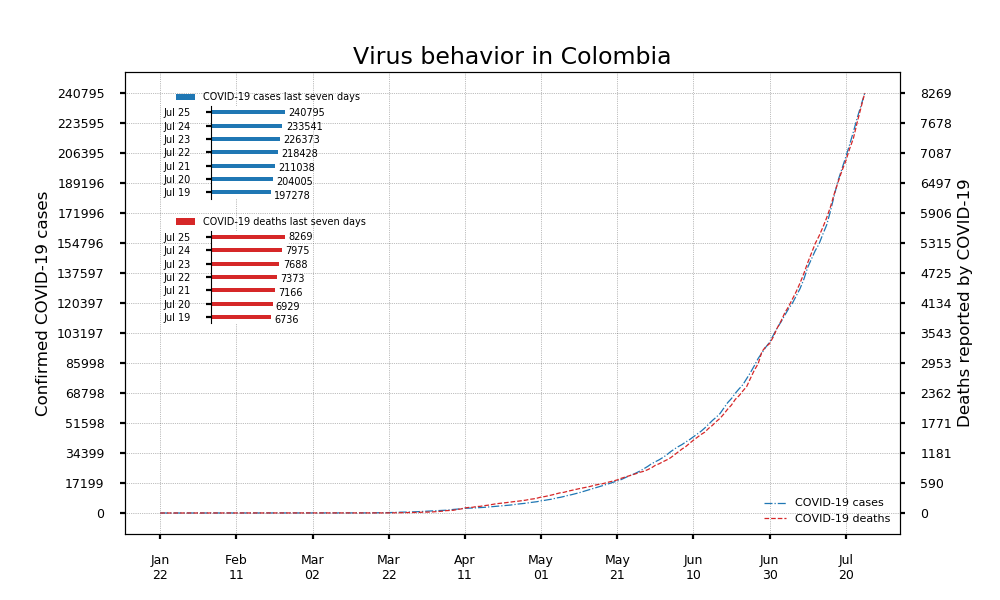

In [127]:
country_plot(data_cases=cases_df, data_death=death_df, country="Colombia", save=True, subplot=True)

<IPython.core.display.Javascript object>


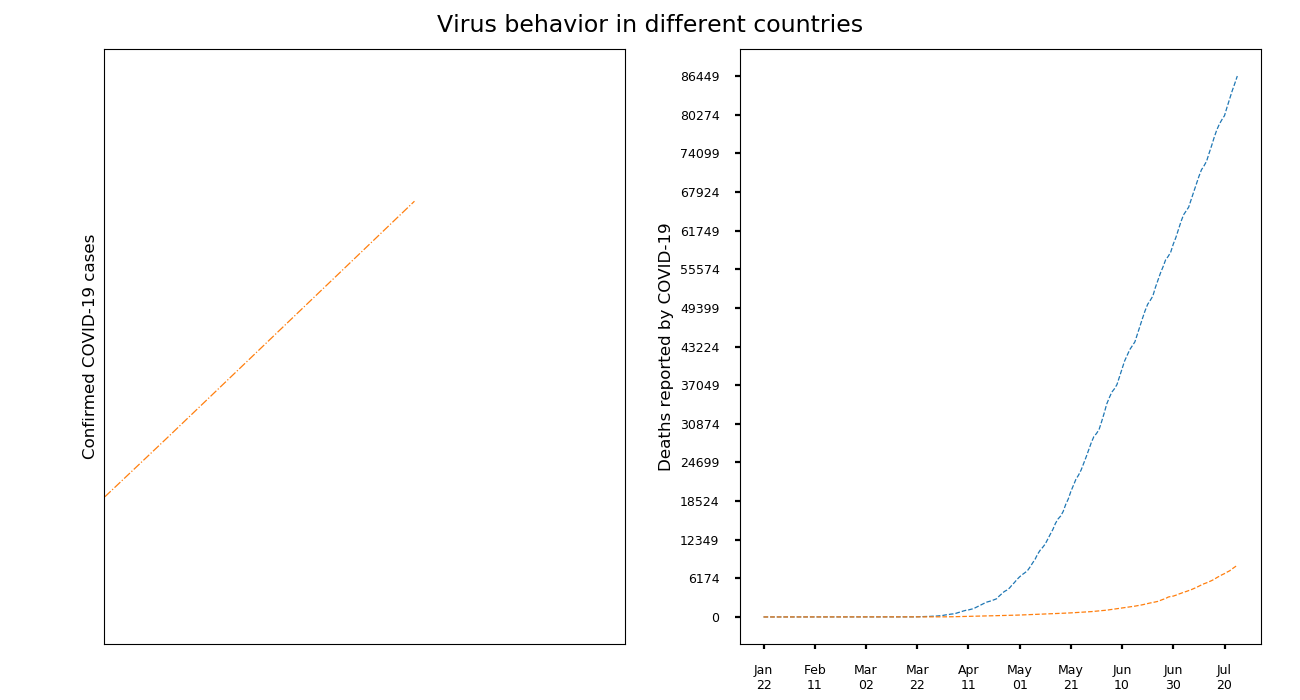

Text(0, 0.5, 'Deaths reported by COVID-19')

In [143]:
# def comparation_plot(countries, save=True):

# Dados da função pasada
labels = "COVID-19 cases,COVID-19 deaths".split(",")
colors = "tab:blue tab:red".split(" ")
linestyle = "-. --".split(" ")
linewidth = 0.9
width = 0.30
step_x = 20 #OK
step_y = 15 #OK
size = 12 #OK
title = "Virus behavior in different countries" #Ok
labely = "Confirmed COVID-19 cases"
labely2 = "Deaths reported by COVID-19"
# 
data_cases=cases_df
data_death=death_df
countries = "Brazil Colombia".split(" ")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 7))
fig.suptitle(f"{title}", size=size + 5)
fig.subplots_adjust(hspace=0.03,
                    wspace=0.22,
                    left=0.08,
                    right=0.97,
                    bottom=0.08,
                    top=0.93)
data_cases_max = 0
data_death_max = 0
for country in countries:
    data_df = data_country(cases_table=data_cases,
                           death_table=data_death,
                           country=country)
    date_time = np.array(list(map(lambda x: datetime.strptime(x, "%m/%d/%y"),
                                  data_df[:, 0])))
    cases = data_df[:, 1]
    deaths = data_df[:, 2]
    
    if cases[-1] > data_cases_max:
        data_cases_max = cases[-1]
    if deaths[-1] > data_death_max:
        data_death_max = deaths[-1]
        
    ax[0].plot(date_time,
               cases,
               label=country,
               ls=linestyle[0],
               linewidth=linewidth)
    ax[1].plot(date_time,
               deaths,
               label=country,
               linewidth=linewidth,
               ls=linestyle[1])
    data_ticks = date_time[np.arange(0,
                                     len(date_time),
                                     step_x)]
    for axis in ax:
        axis.set_xticks(data_ticks)
        axis.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%d'))
        axis.xaxis.set_tick_params(rotation=0,
                                   labelsize=size-3)
cases_tick = np.linspace(0,
                         data_cases_max,
                         step_y,
                         dtype=int)
ax[0].set_yticks(cases_tick)
ax[0].yaxis.set_tick_params(labelsize=size-3)
ax[0].set_ylabel(labely,
                 size=size)

death_tick = np.linspace(0,
                         data_death_max,
                         step_y,
                         dtype=int)
ax[1].set_yticks(death_tick)
ax[1].yaxis.set_tick_params(labelsize=size-3)
ax[1].set_ylabel(labely2,
                 size=size)



In [139]:
ax[0].get_ylim()

(-119725.65000000001, 2514238.65)

In [142]:
cases_df.loc["Brazil"]

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
            ...   
7/21/20    2159654
7/22/20    2227514
7/23/20    2287475
7/24/20    2343366
7/25/20    2394513
Name: Brazil, Length: 186, dtype: int64